### Packages & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import load_data

In [2]:
filepath_path = "data/vihallu-train.csv"
data = load_data(filepath_path)
data.head()

,id,context,prompt,response,label
0,9b1ea51d-d1ff-45ba-8cf1-6a91328e8600,"Vào những năm 1870, hai nhà điêu khắc Augustus...","Vào những năm 1960, nơi nào trở thành trung tâ...",Quảng trường Washington là trung tâm của thế h...,extrinsic
1,db7a89c6-2a6a-42af-beef-58e557ecc819,Cách mạng Tháng Mười đã biến một cuộc chiến tr...,Cách mạng Tháng Mười đã khởi xướng chủ nghĩa p...,Sai. Cách mạng Tháng Mười đã đánh bại chủ nghĩ...,no
2,10fca062-d343-4eca-8434-93c7a8aa5e0e,Vị trí địa lý nằm giữa phương Đông và Địa Trun...,Dựa trên việc Đế quốc Ottoman không bao giờ ki...,Nền ẩm thực của Thổ Nhĩ Kỳ được xây dựng từ gi...,extrinsic
3,ece8eb9e-d6bb-407a-a567-d9531861c603,"Hồ Quý Ly trước có tên là Lê Quý Ly (黎季犛), biể...",Đời cháu thứ 12 của Hồ Hưng Dật sống ở đâu?,"Đời cháu thứ 12 của Hồ Hưng Dật, là Hồ Liêm, s...",no
4,b613217f-df2a-491e-8326-25811a31eb09,"Năm 2007, Bồ Đào Nha có khoảng 332.137 người n...","Từ thập niên 1990, tại sao xuất hiện một vài l...",Mặc dù Bồ Đào Nha đã đóng cửa biên giới hoàn t...,intrinsic


#### Problem Details
- Input: context, prompt, & response

- Output: label (no|extrinsic|intrinsic)
    - no: 
        - It is completely consistent and truthful with the information provided in the context.
        - It does not contain any false information or information that cannot be directly inferred from the context.
        - It answers correctly based on the context.
    - extrinsic:
        - It directly contradicts or distorts information clearly provided in the context.
        - The content of the illusion is still based on entities or concepts present in the context, but the information about them is altered or distorted.
        - The LLM produces a misleading answer that sounds quite plausible in that context.
    - intrinsic
        - It supplements information NOT PRESENT in the context.
        - The additional information cannot be inferred from the context.
        - The additional information might be true in the real world, but it is not provided in the context.
        - The response still tries to answer the prompt but adds details not originating from the context.

### Data Analysis

In [3]:
print("Distribution of label:\n", data['label'].value_counts().reset_index())

Distribution of label:
        label  count
0  intrinsic   2448
1  extrinsic   2307
2         no   2245


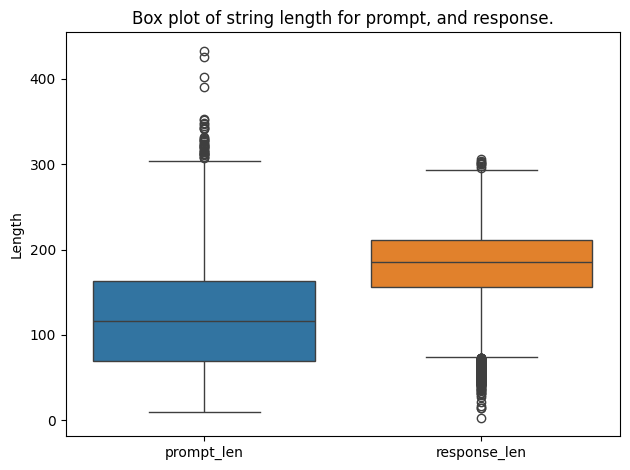

In [4]:
data['prompt_len'] = data['prompt'].astype(str).apply(len)
data['response_len'] = data['response'].astype(str).apply(len)

plt.figure()
sns.boxplot(data=data[['prompt_len', 'response_len']])
plt.title('Box plot of string length for prompt, and response.')
plt.ylabel('Length')
plt.tight_layout()
plt.show()

In [5]:
data['context_len'] = data['context'].astype(str).apply(len)
print("Mean lengths of input by label:\n", data.groupby('label')[['context_len', 'prompt_len', 'response_len']].mean().reset_index())

Mean lengths of input by label:
        label  context_len  prompt_len  response_len
0  extrinsic   819.482445  118.396186    210.470308
1  intrinsic   839.661356  123.687908    179.891748
2         no   829.976837  120.155902    151.793318


In [9]:
def sentence_count(text):
    sentences = text.split('.')  
    sentences = [s.strip() for s in sentences if s.strip()] 
    return len(sentences)

data['response_sentence_count'] = data['response'].apply(sentence_count)
frequency_table = data['response_sentence_count'].value_counts().sort_index()
frequency_table

response_sentence_count
1    4495
2    2185
3     279
4      28
5      10
6       3
Name: count, dtype: int64